### <font color='orangered'>Importing Libraries

In [2]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NeighbourhoodCleaningRule
#from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss


### <font color='orangered'>Reading the input data

In [5]:
drought_df = pd.read_csv('train_timeseries.csv')
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [6]:
#drought_df=drought_df[:500000]

### <font color='orangered'>Initial exploration and data cleaning (Data Wrangling)


In [8]:
drought_df.info()
# import numpy as np
# print(np.__version__)
# !pip3 install numpy --upgrade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [9]:
drought_df.isnull().sum()


fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

#### <font color='darkblue'>Missing value Treatment

In [11]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

#### <font color='darkblue'>Reformatting the data

In [13]:
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [14]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int32
month            int32
day              int32
dtype: object

In [15]:
drought_df['fips'].nunique()

3108

In [16]:
drought_df['score'].round().value_counts()

score
0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: count, dtype: int64

### <font color='orangered'>**Exploratory Data Analysis**

#### <font color='darkblue'>Univariate Analysis - Descriptive statistics

In [19]:
column_list = list(drought_df.columns)
column_list

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

#### <font color='darkblue'>Univariate Analysis - Distribution of continuous variables

In [21]:
measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

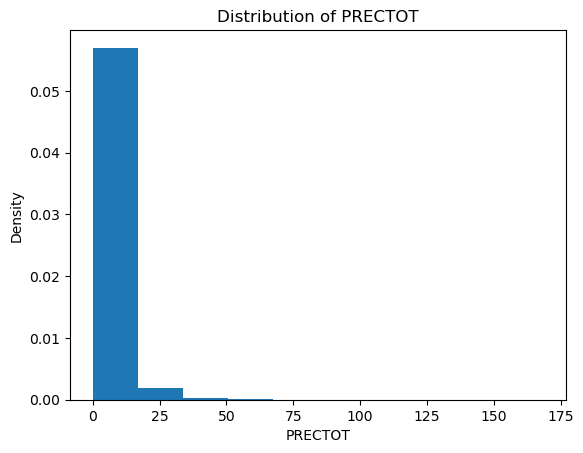

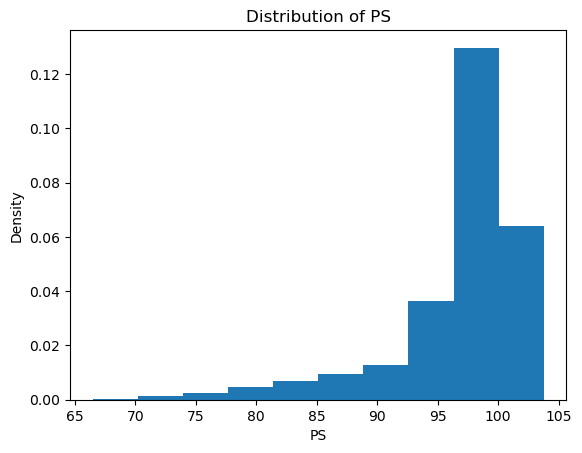

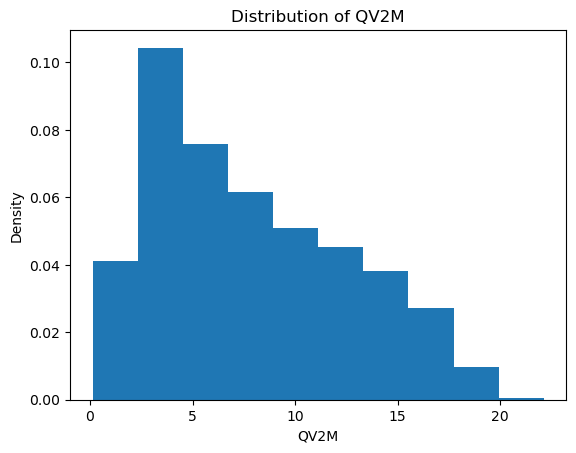

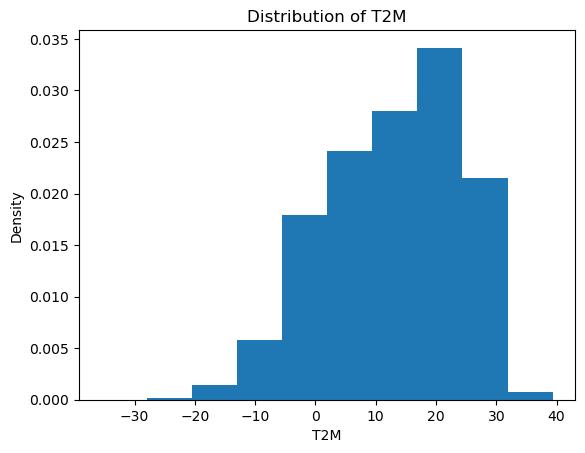

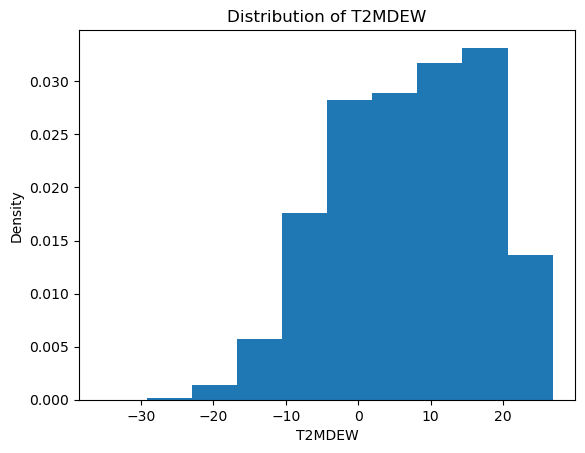

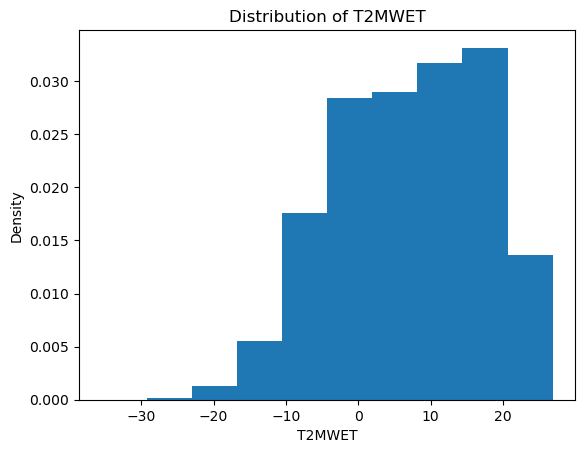

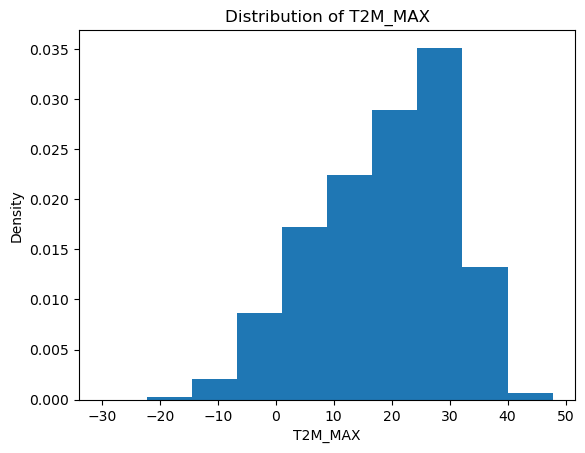

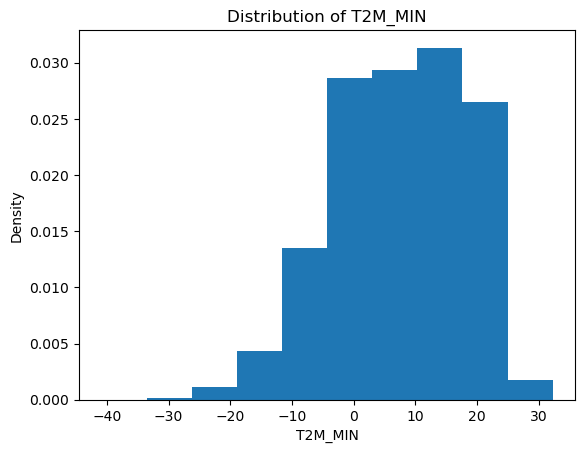

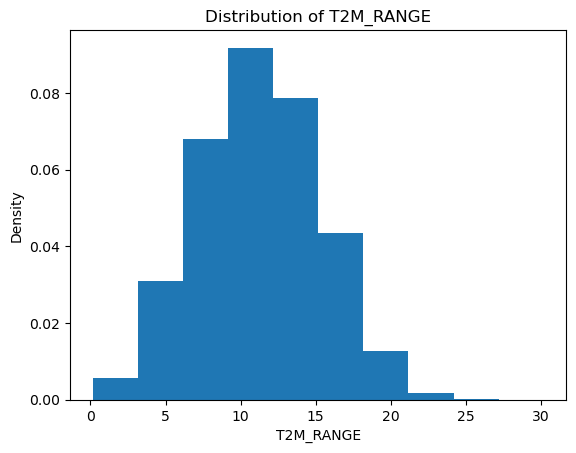

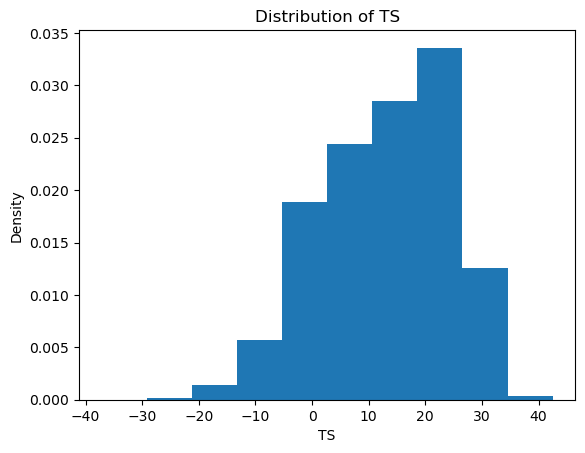

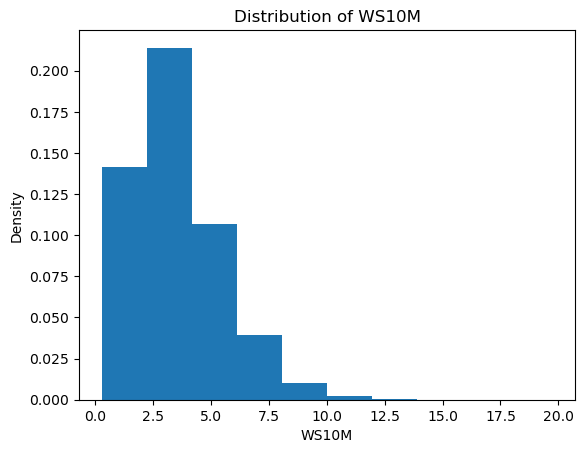

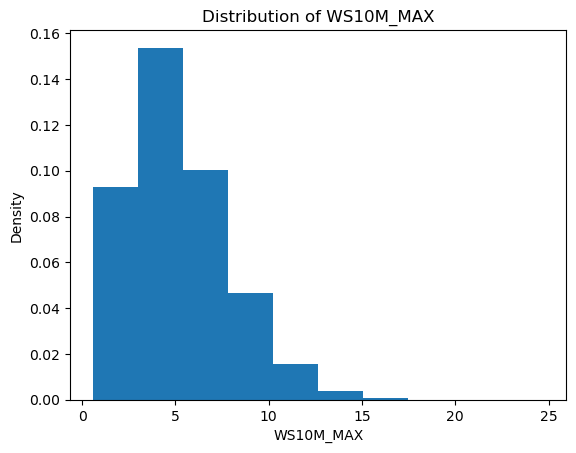

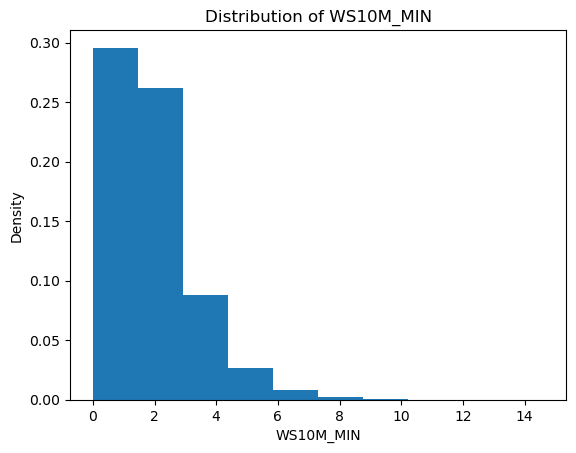

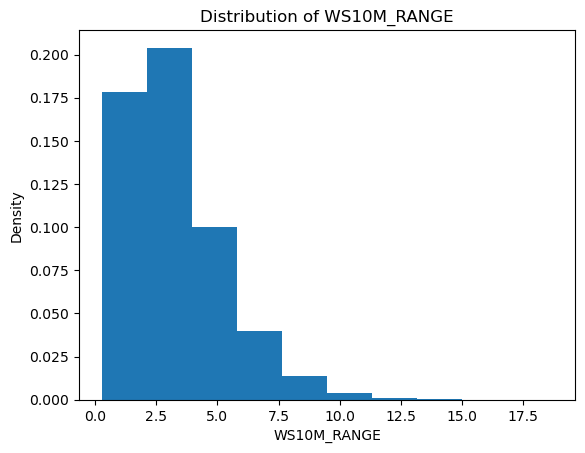

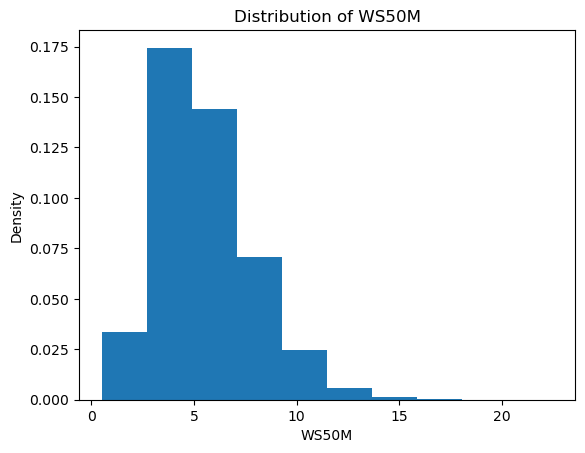

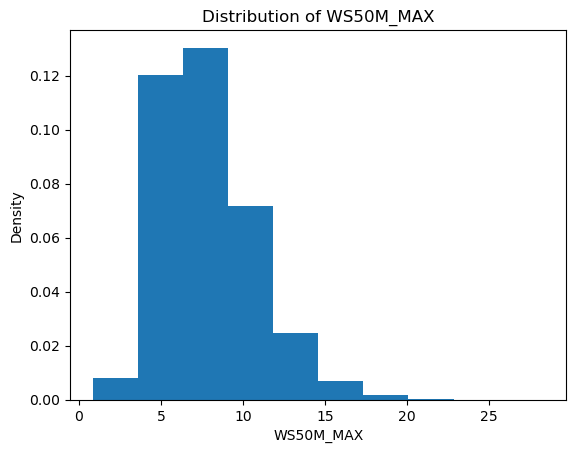

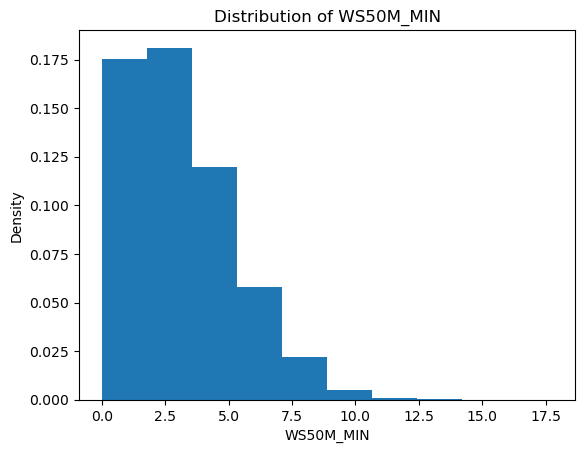

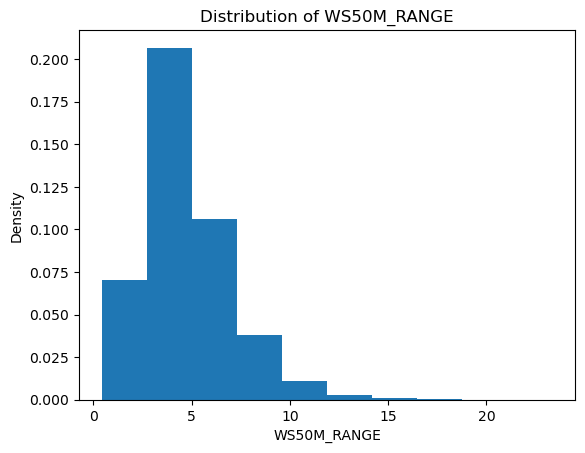

In [22]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

### <font color='darkblue'>Outlier Treatment

#### <font color='blue'>Identifying Outliers

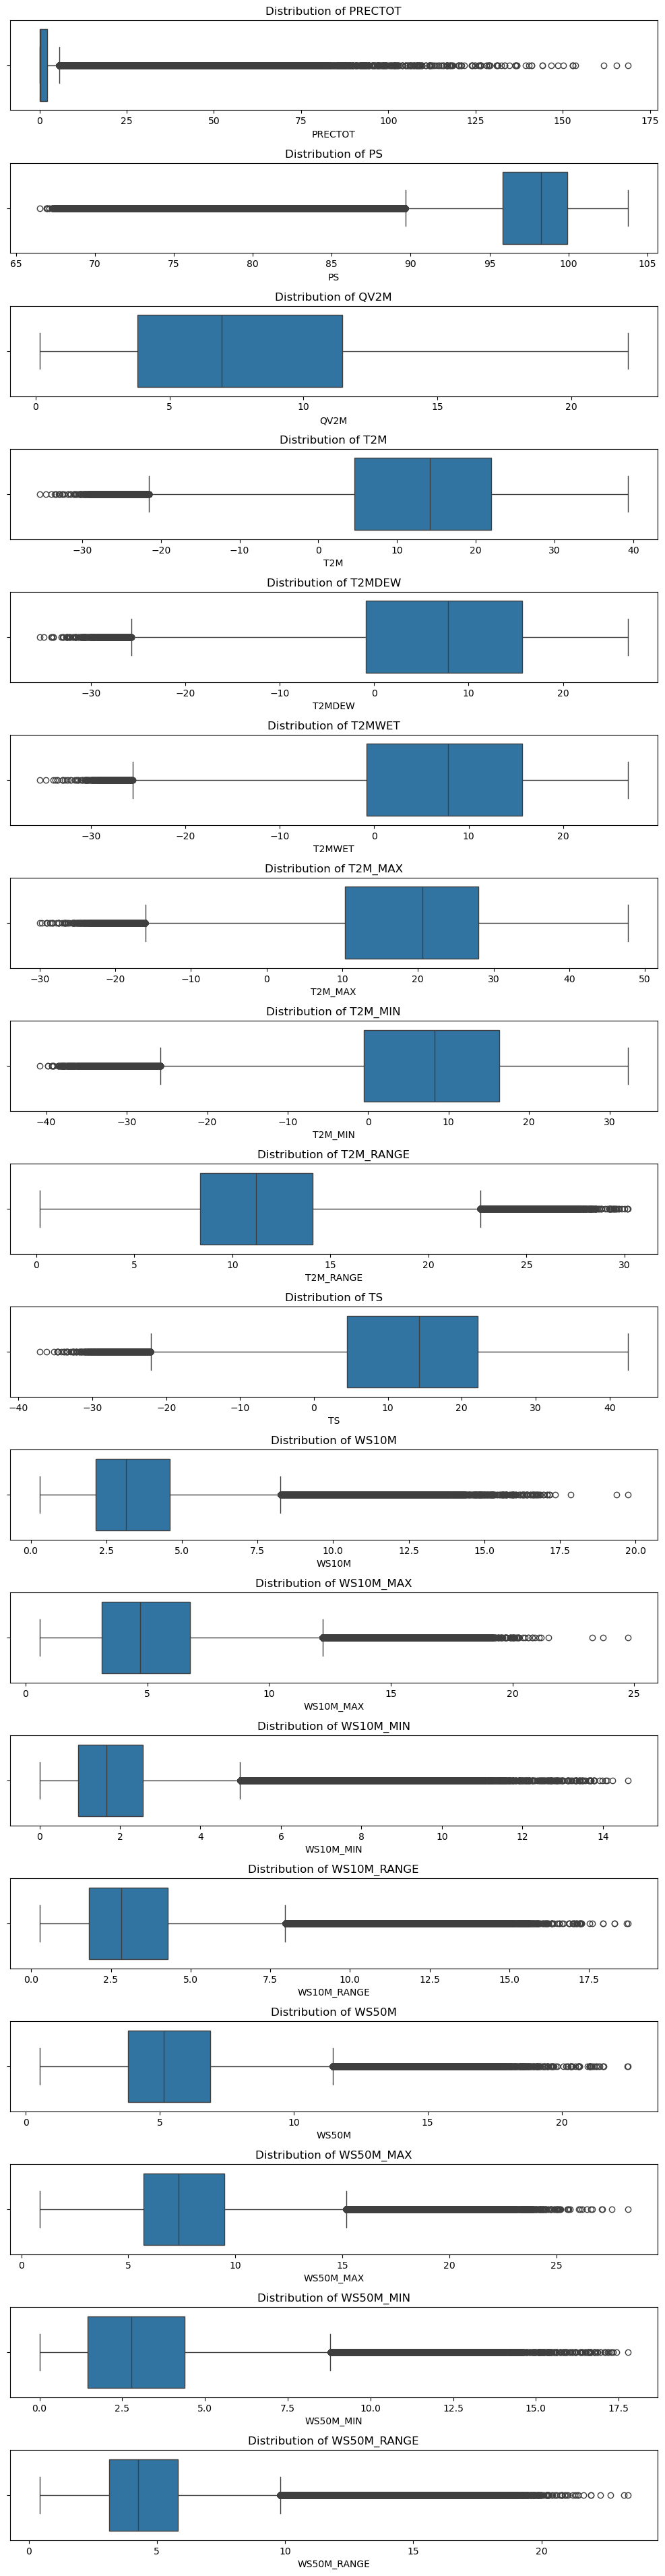

In [25]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  drought_df_measures.columns[x-1], data=drought_df_measures)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')
plt.tight_layout()

In [26]:
print('Total rows = ',len(drought_df_measures.index))
for i in drought_df_measures.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyond standard outlier limit in ', i)
    print(len(drought_df_measures[(drought_df_measures[i] > drought_df_measures[i].mean() + 3*drought_df_measures[i].std()) | (drought_df_measures[i] < drought_df_measures[i].mean() - 3*drought_df_measures[i].std())]))

Total rows =  2756796
Number of values beyond standard outlier limit in  PRECTOT
65933
Number of values beyond standard outlier limit in  PS
73197
Number of values beyond standard outlier limit in  QV2M
1
Number of values beyond standard outlier limit in  T2M
4531
Number of values beyond standard outlier limit in  T2MDEW
2023
Number of values beyond standard outlier limit in  T2MWET
1814
Number of values beyond standard outlier limit in  T2M_MAX
3384
Number of values beyond standard outlier limit in  T2M_MIN
6944
Number of values beyond standard outlier limit in  T2M_RANGE
3628
Number of values beyond standard outlier limit in  TS
4762
Number of values beyond standard outlier limit in  WS10M
29954
Number of values beyond standard outlier limit in  WS10M_MAX
23387
Number of values beyond standard outlier limit in  WS10M_MIN
39901
Number of values beyond standard outlier limit in  WS10M_RANGE
35979
Number of values beyond standard outlier limit in  WS50M
23090
Number of values beyond sta

#### <font color='black'>Removing values beyond the standard outlier limit

In [28]:
drought_df = drought_df[(drought_df['PRECTOT'] <= drought_df['PRECTOT'].mean() + 3*drought_df['PRECTOT'].std()) &
        (drought_df['PRECTOT'] >= drought_df['PRECTOT'].mean() - 3*drought_df['PRECTOT'].std())]

drought_df = drought_df[(drought_df['PS'] <= drought_df['PS'].mean() + 3*drought_df['PS'].std()) &
        (drought_df['PS'] >= drought_df['PS'].mean() - 3*drought_df['PS'].std())]

drought_df = drought_df[(drought_df['QV2M'] <= drought_df['QV2M'].mean() + 3*drought_df['QV2M'].std()) &
        (drought_df['QV2M'] >= drought_df['QV2M'].mean() - 3*drought_df['QV2M'].std())]

drought_df = drought_df[(drought_df['T2M'] <= drought_df['T2M'].mean() + 3*drought_df['T2M'].std()) &
        (drought_df['T2M'] >= drought_df['T2M'].mean() - 3*drought_df['T2M'].std())]

drought_df = drought_df[(drought_df['T2MDEW'] <= drought_df['T2MDEW'].mean() + 3*drought_df['T2MDEW'].std()) &
        (drought_df['T2MDEW'] >= drought_df['T2MDEW'].mean() - 3*drought_df['T2MDEW'].std())]

drought_df = drought_df[(drought_df['T2MWET'] <= drought_df['T2MWET'].mean() + 3*drought_df['T2MWET'].std()) &
        (drought_df['T2MWET'] >= drought_df['T2MWET'].mean() - 3*drought_df['T2MWET'].std())]

drought_df = drought_df[(drought_df['T2M_MAX'] <= drought_df['T2M_MAX'].mean() + 3*drought_df['T2M_MAX'].std()) &
        (drought_df['T2M_MAX'] >= drought_df['T2M_MAX'].mean() - 3*drought_df['T2M_MAX'].std())]

drought_df = drought_df[(drought_df['T2M_MIN'] <= drought_df['T2M_MIN'].mean() + 3*drought_df['T2M_MIN'].std()) &
        (drought_df['T2M_MIN'] >= drought_df['T2M_MIN'].mean() - 3*drought_df['T2M_MIN'].std())]

drought_df = drought_df[(drought_df['T2M_RANGE'] <= drought_df['T2M_RANGE'].mean() + 3*drought_df['T2M_RANGE'].std()) &
        (drought_df['T2M_RANGE'] >= drought_df['T2M_RANGE'].mean() - 3*drought_df['T2M_RANGE'].std())]

drought_df = drought_df[(drought_df['TS'] <= drought_df['TS'].mean() + 3*drought_df['TS'].std()) &
        (drought_df['TS'] >= drought_df['TS'].mean() - 3*drought_df['TS'].std())]

drought_df = drought_df[(drought_df['WS10M'] <= drought_df['WS10M'].mean() + 3*drought_df['WS10M'].std()) &
        (drought_df['WS10M'] >= drought_df['WS10M'].mean() - 3*drought_df['WS10M'].std())]

drought_df = drought_df[(drought_df['WS10M_MAX'] <= drought_df['WS10M_MAX'].mean() + 3*drought_df['WS10M_MAX'].std()) &
        (drought_df['WS10M_MAX'] >= drought_df['WS10M_MAX'].mean() - 3*drought_df['WS10M_MAX'].std())]

drought_df = drought_df[(drought_df['WS10M_MIN'] <= drought_df['WS10M_MIN'].mean() + 3*drought_df['WS10M_MIN'].std()) &
        (drought_df['WS10M_MIN'] >= drought_df['WS10M_MIN'].mean() - 3*drought_df['WS10M_MIN'].std())]

drought_df = drought_df[(drought_df['WS10M_RANGE'] <= drought_df['WS10M_RANGE'].mean() + 3*drought_df['WS10M_RANGE'].std()) &
        (drought_df['WS10M_RANGE'] >= drought_df['WS10M_RANGE'].mean() - 3*drought_df['WS10M_RANGE'].std())]

drought_df = drought_df[(drought_df['WS50M'] <= drought_df['WS50M'].mean() + 3*drought_df['WS50M'].std()) &
        (drought_df['WS50M'] >= drought_df['WS50M'].mean() - 3*drought_df['WS50M'].std())]

drought_df = drought_df[(drought_df['WS50M_MAX'] <= drought_df['WS50M_MAX'].mean() + 3*drought_df['WS50M_MAX'].std()) &
        (drought_df['WS50M_MAX'] >= drought_df['WS50M_MAX'].mean() - 3*drought_df['WS50M_MAX'].std())]

drought_df = drought_df[(drought_df['WS50M_MIN'] <= drought_df['WS50M_MIN'].mean() + 3*drought_df['WS50M_MIN'].std()) &
        (drought_df['WS50M_MIN'] >= drought_df['WS50M_MIN'].mean() - 3*drought_df['WS50M_MIN'].std())]

drought_df = drought_df[(drought_df['WS50M_RANGE'] <= drought_df['WS50M_RANGE'].mean() + 3*drought_df['WS50M_RANGE'].std()) &
        (drought_df['WS50M_RANGE'] >= drought_df['WS50M_RANGE'].mean() - 3*drought_df['WS50M_RANGE'].std())]

print('Total rows = ',len(drought_df.index))

Total rows =  2474338


#### <font color='darkblue'>Univariate Analysis - Distribution of categorical variables

In [30]:
categorical_column_list = ['score','year','month','day']
drought_df_categorical = drought_df[['score','year','month','day']]

<Figure size 1000x4000 with 0 Axes>

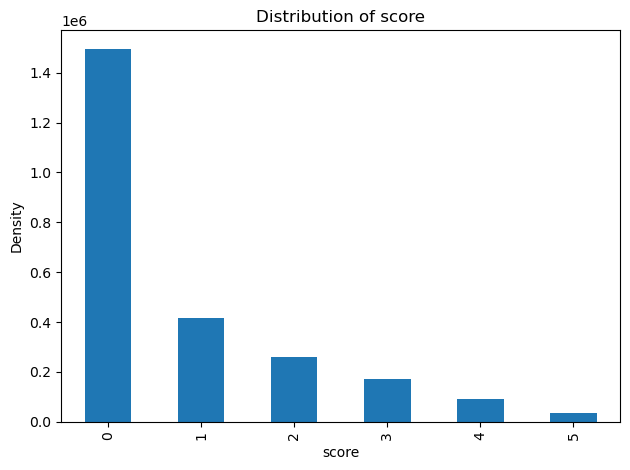

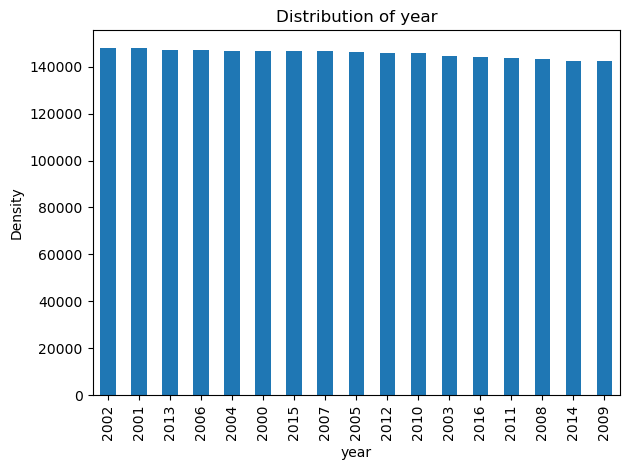

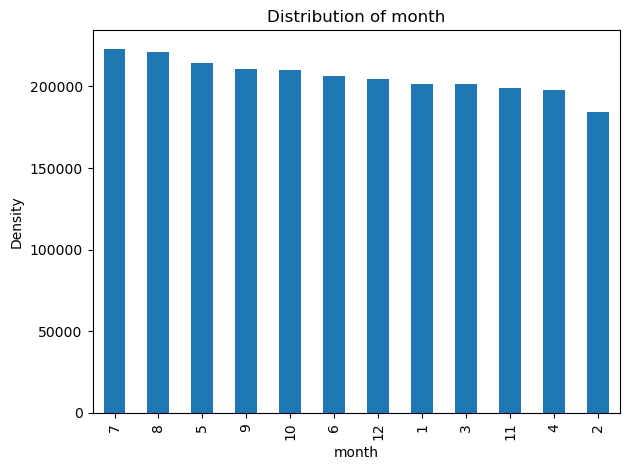

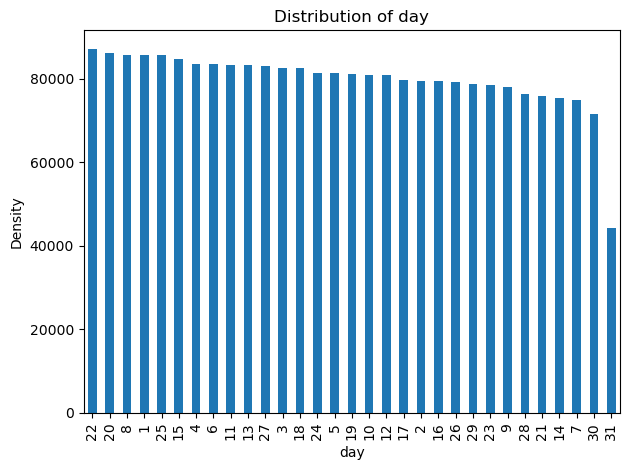

In [31]:
# Distribution of categorical variables
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()

#### <font color='darkblue'>Bivariate Analysis

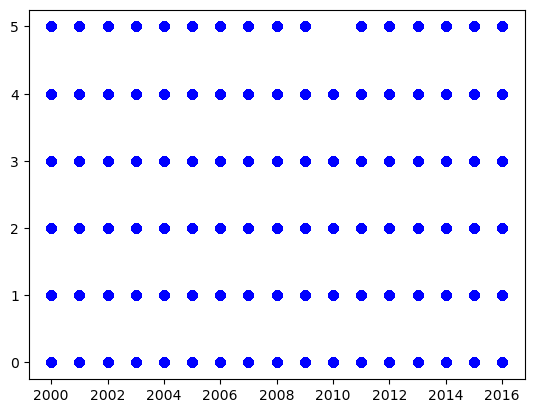

In [33]:
plt.scatter(drought_df['year'], drought_df['score'], c ="blue")
plt.show()

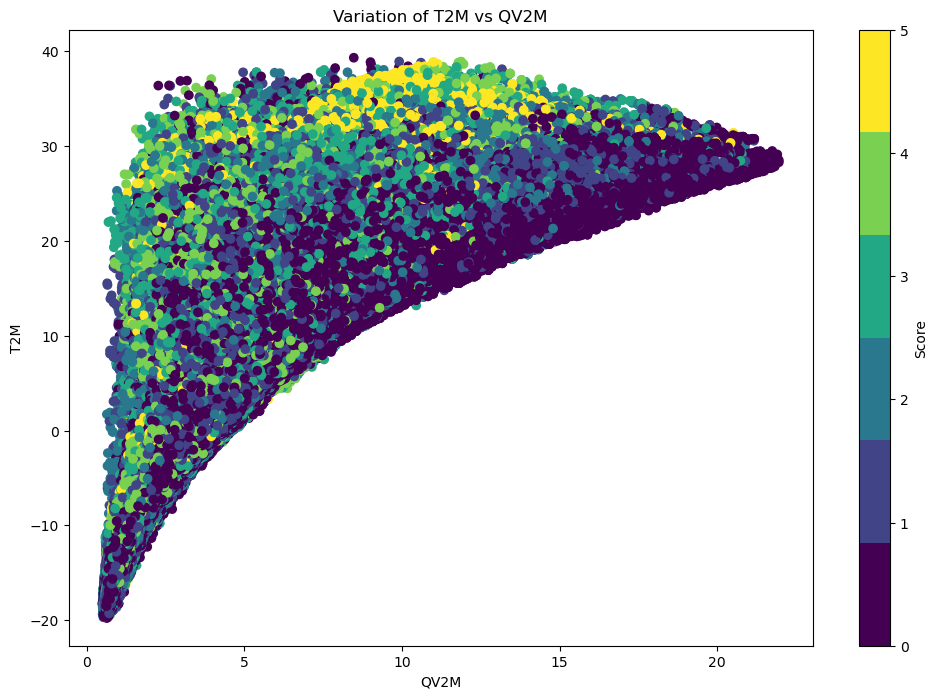

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.figure(figsize=(12,8))
# Define unique score categories
unique_scores = drought_df['score'].unique()

# Create a colormap
cmap = plt.cm.get_cmap('viridis', len(unique_scores))
scatter=plt.scatter(drought_df['QV2M'], drought_df['T2M'], c =drought_df['score'], cmap=cmap)
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
# Create a colorbar for the score legend
cbar = plt.colorbar(scatter)
cbar.set_label('Score')
plt.show()

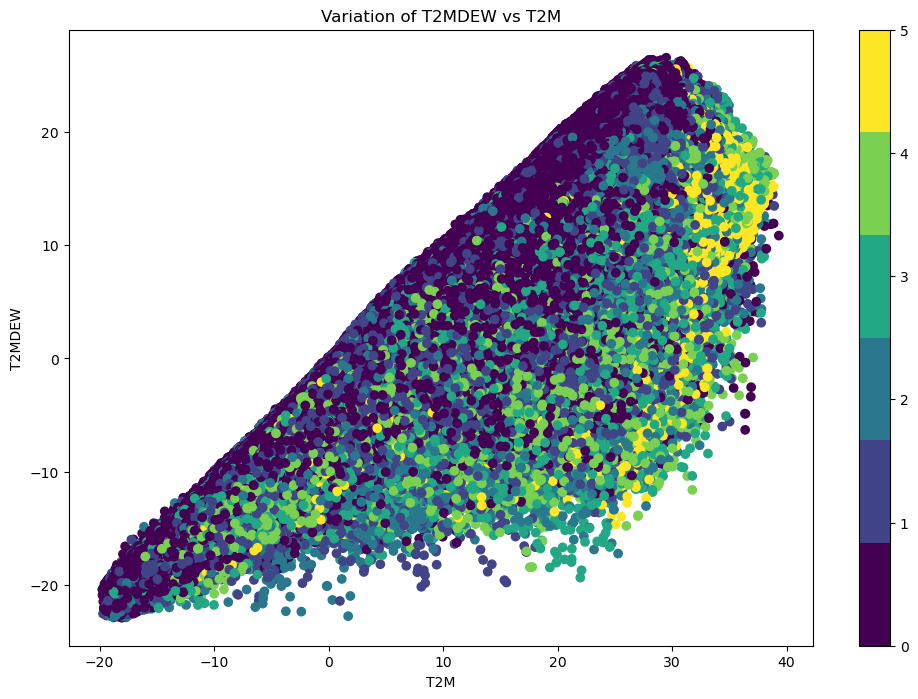

In [35]:
# Define unique score categories
unique_scores = drought_df['score'].unique()
plt.figure(figsize=(12,8))
# Create a colormap
cmap = plt.cm.get_cmap('viridis', len(unique_scores))
scatter=plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c =drought_df['score'], cmap=cmap)
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2MDEW vs T2M')
# Create a colorbar for the score legend
cbar = plt.colorbar(scatter)
plt.show()

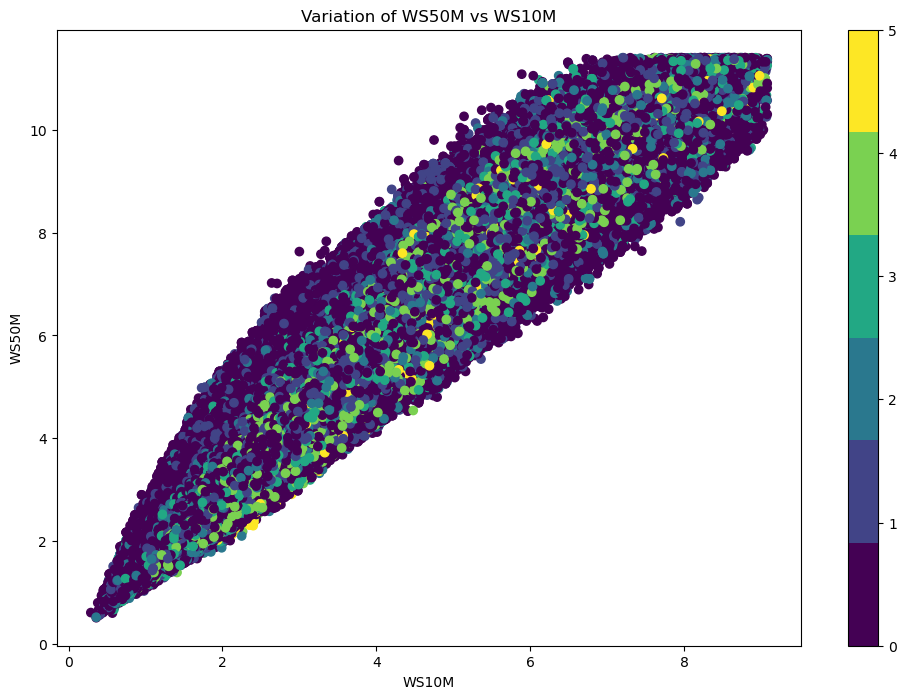

In [36]:
# Define unique score categories
unique_scores = drought_df['score'].unique()
plt.figure(figsize=(12,8))

# Create a colormap
cmap = plt.cm.get_cmap('viridis', len(unique_scores))
scatter=plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c= drought_df['score'], cmap=cmap)
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS50M vs WS10M')
# Create a colorbar for the score legend
cbar = plt.colorbar(scatter)
plt.show()

#### <font color='darkblue'> Extracting Dependent and Independent Variables

In [38]:
independent_variables = drought_df.drop('score',axis=1)
independent_variables = independent_variables.drop('fips', axis=1)
independent_variables = independent_variables.drop('date', axis=1)
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1


In [39]:
target = drought_df['score']
target.head()

3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int64

### <font color='orangered'>Correlation between independent variables for Feature Selection

In [41]:
correlation_plot = drought_df_measures.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.068775,0.245081,0.093258,0.231035,0.230975,0.026773,0.144929,-0.304171,0.089598,0.049730,0.060981,0.023346,0.065755,0.069057,0.079508,0.057816,0.047477
PS,0.068775,1.000000,0.282412,0.164160,0.341234,0.341252,0.111979,0.208285,-0.225935,0.163830,-0.080747,-0.135905,0.022932,-0.198332,-0.043315,-0.091821,0.036238,-0.154479
QV2M,0.245081,0.282412,1.000000,0.870242,0.959385,0.960434,0.804338,0.906144,-0.071547,0.862559,-0.225449,-0.256452,-0.108789,-0.269203,-0.205971,-0.249961,-0.081554,-0.246203
T2M,0.093258,0.164160,0.870242,1.000000,0.913530,0.914218,0.983356,0.981629,0.244357,0.997515,-0.207874,-0.220192,-0.125407,-0.209030,-0.193196,-0.206444,-0.112579,-0.159589
T2MDEW,0.231035,0.341234,0.959385,0.913530,1.000000,0.999970,0.854716,0.939934,-0.015643,0.905184,-0.238299,-0.268686,-0.115920,-0.280702,-0.204238,-0.245323,-0.082416,-0.239335
T2MWET,0.230975,0.341252,0.960434,0.914218,0.999970,1.000000,0.855401,0.940629,-0.015500,0.905911,-0.237971,-0.268292,-0.115882,-0.280199,-0.204143,-0.245147,-0.082497,-0.239029
T2M_MAX,0.026773,0.111979,0.804338,0.983356,0.854716,0.855401,1.000000,0.937762,0.407534,0.980101,-0.216764,-0.221671,-0.141911,-0.199614,-0.195727,-0.196236,-0.133234,-0.126331
T2M_MIN,0.144929,0.208285,0.906144,0.981629,0.939934,0.940629,0.937762,1.000000,0.065037,0.979134,-0.206382,-0.225829,-0.112878,-0.225256,-0.197991,-0.225744,-0.096593,-0.200157
T2M_RANGE,-0.304171,-0.225935,-0.071547,0.244357,-0.015643,-0.015500,0.407534,0.065037,1.000000,0.241564,-0.080163,-0.043127,-0.110952,0.018746,-0.041778,0.029737,-0.128844,0.163320
TS,0.089598,0.163830,0.862559,0.997515,0.905184,0.905911,0.980101,0.979134,0.241564,1.000000,-0.189823,-0.202713,-0.110273,-0.196015,-0.180665,-0.193347,-0.102367,-0.152434


#### <font color='darkgreen'>Attributes QV2M,	T2M,	T2MDEW,	T2MWET,	T2M_MAX,	T2M_MIN and TS have shown strong positive correlation

#### <font color='darkgreen'>Similary WS10M,	WS10M_MAX and	WS10M_MIN have shown a strong positve correlation

#### <font color='darkgreen'>Likewise, WS50M,	WS50M_MAX and	WS50M_MIN	show strong positive correlation

#### <font color='darkgreen'>However, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence we'll retain all these variables, and try other feature selection methods.

### <font color='orangered'>Splitting into train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [45]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (1979470, 21)
Train target shape (1979470,)
Test features shape (494868, 21)
Test target shape (494868,)


### <font color='orangered'>Standardizing the data

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 2.39997504, -0.78416609,  0.74119512, ..., -1.42190019,
        -0.16603116,  1.17395993],
       [ 2.44655066,  0.37551891, -0.51918943, ...,  0.61688719,
         1.00794799,  0.26443762],
       [-0.51617644, -0.98505641, -1.00721711, ..., -1.62577893,
         1.30144278, -0.19032353],
       ...,
       [ 2.73117947, -1.01929907, -0.79927488, ...,  0.61688719,
         1.59493757,  1.28765022],
       [ 0.22385845,  0.40519588,  1.29500045, ...,  1.2285234 ,
         0.7144532 , -1.55460699],
       [-0.51617644,  0.75903678,  1.43292132, ..., -1.01414272,
        -0.16603116,  0.94657935]])

### <font color='orangered'>Feature Selection using RFE and Random Forest algorithm

In [49]:
# https://www.geeksforgeeks.org/recursive-feature-elimination-with-cross-validation-in-scikit-learn/
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [False  True  True  True  True False  True  True  True  True  True False
 False  True  True  True False  True  True False  True]
Feature Ranking: [5 1 1 1 1 2 1 1 1 1 1 4 6 1 1 1 3 1 1 7 1]
Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_RANGE', 'year',
       'day'],
      dtype='object')


In [50]:
independent_variables = independent_variables.drop('PRECTOT', axis=1)
independent_variables = independent_variables.drop('T2MWET', axis=1)
independent_variables = independent_variables.drop('WS10M_MAX', axis=1)
independent_variables = independent_variables.drop('WS10M_MIN', axis=1)
independent_variables = independent_variables.drop('WS50M_MIN', axis=1)
independent_variables = independent_variables.drop('month', axis=1)
independent_variables.head()

X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train features shape (1979470, 15)
Train target shape (1979470,)
Test features shape (494868, 15)
Test target shape (494868,)


### <font color='orangered'>Fixing class imbalance

#### <font color='purple'>Upsampling using SMOTE

In [53]:
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())

In [54]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (1979470, 15)
Before OverSampling, the shape of train_y: (1979470,) 

After OverSampling, the shape of train_X: (7173186, 15)
After OverSampling, the shape of train_y: (7173186,) 

Counts of label '0' - Before Oversampling:1195531, After OverSampling: 1195531
Counts of label '1' - Before Oversampling:332490, After OverSampling: 1195531
Counts of label '2' - Before Oversampling:209363, After OverSampling: 1195531
Counts of label '3' - Before Oversampling:139009, After OverSampling: 1195531
Counts of label '4' - Before Oversampling:74270, After OverSampling: 1195531
Counts of label '5' - Before Oversampling:28807, After OverSampling: 1195531


#### <font color='purple'>Downsampling using Neighborhood Cleaning Rule

In [56]:
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [57]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (1979470, 15)
Before UnderSampling, the shape of train_y: (1979470,) 

After UnderSampling, the shape of train_X: (1563971, 15)
After UnderSampling, the shape of train_y: (1563971,) 

Counts of label '0' - Before UnderSampling:1195531, After UnderSampling: 1114739
Counts of label '1' - Before UnderSampling:332490, After UnderSampling: 199264
Counts of label '2' - Before UnderSampling:209363, After UnderSampling: 112955
Counts of label '3' - Before UnderSampling:139009, After UnderSampling: 72706
Counts of label '4' - Before UnderSampling:74270, After UnderSampling: 35500
Counts of label '5' - Before UnderSampling:28807, After UnderSampling: 28807


#### <font color='purple'>Downsampling using Near Miss

In [59]:
undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

In [60]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (1979470, 15)
Before UnderSampling, the shape of train_y: (1979470,) 

After UnderSampling, the shape of train_X: (172842, 15)
After UnderSampling, the shape of train_y: (172842,) 

Counts of label '0' - Before UnderSampling:1195531, After UnderSampling: 28807
Counts of label '1' - Before UnderSampling:332490, After UnderSampling: 28807
Counts of label '2' - Before UnderSampling:209363, After UnderSampling: 28807
Counts of label '3' - Before UnderSampling:139009, After UnderSampling: 28807
Counts of label '4' - Before UnderSampling:74270, After UnderSampling: 28807
Counts of label '5' - Before UnderSampling:28807, After UnderSampling: 28807


### <font color='orangered'>PCA for dimensionality reduction

#### <font color='purple'>PCA on Near miss Downsampled Data

In [63]:
pca = PCA()
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [64]:
print(pca.explained_variance_ratio_)

[4.39760721e-01 2.06554074e-01 9.20985742e-02 8.38908079e-02
 6.15225086e-02 4.90846601e-02 4.29803961e-02 1.13563716e-02
 7.51220366e-03 2.25102252e-03 1.50262743e-03 1.06647500e-03
 3.46162832e-04 7.33860529e-05 8.85472048e-09]


In [65]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [66]:
print(pca.explained_variance_ratio_)

[0.43976072 0.20655407 0.09209857 0.08389081 0.06152251]


#### <font color='purple'>PCA on SMOTE Upsampled Data

In [68]:
pca = PCA()
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [69]:
print(pca.explained_variance_ratio_)

[4.01947710e-01 2.23673611e-01 1.09509945e-01 6.43128546e-02
 6.35497118e-02 6.02121410e-02 5.14722685e-02 1.16854122e-02
 8.25314597e-03 2.35653307e-03 1.53943482e-03 1.05901039e-03
 3.59881822e-04 6.83351075e-05 4.98695519e-09]


In [70]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [71]:
print(pca.explained_variance_ratio_)

[0.40194771 0.22367361 0.10950995 0.06431285 0.06354971]


### <font color='orangered'>Model Development

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling

In [74]:
DT_classifier_NM = DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train_dres_nm,y_train_dres_nm)
y_pred_NM = DT_classifier_NM.predict(X_test)

In [75]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:

[[58133 54900 58917 47927 36352 43016]
 [ 9079 18289 16898 14101 11127 13572]
 [ 3589  7220 13396 10439  7912  9993]
 [ 1604  3166  5727 10218  6388  7390]
 [  572  1008  1677  3463  6784  4916]
 [   88   124   227   452  1380  4824]]
              precision    recall  f1-score   support

           0       0.80      0.19      0.31    299245
           1       0.22      0.22      0.22     83066
           2       0.14      0.25      0.18     52549
           3       0.12      0.30      0.17     34493
           4       0.10      0.37      0.15     18420
           5       0.06      0.68      0.11      7095

    accuracy                           0.23    494868
   macro avg       0.24      0.34      0.19    494868
weighted avg       0.54      0.23      0.26    494868

Accuracy: 0.2256035953021816
Precision: 0.5447079836581246
Recall: 0.2256035953021816
F1 Score: 0.26347777488012986
Cohen Kappa Score: 0.0795499766101283

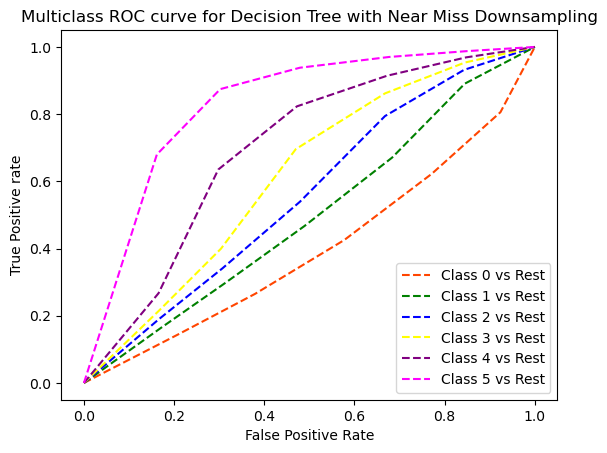

In [76]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling - Hyperparameter Tuning

In [78]:
params = {
          'max_depth': [3, 5, 10, 20],
          'min_samples_leaf': [10, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}

In [79]:
grid_search_DT_NM = GridSearchCV(estimator=DT_classifier_NM,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [80]:
%%time
grid_search_DT_NM.fit(X_train_dres_nm,y_train_dres_nm)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


python(40038) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40040) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


CPU times: user 2.42 s, sys: 276 ms, total: 2.7 s
Wall time: 18.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [81]:
score_df = pd.DataFrame(grid_search_DT_NM.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
44,2.142116,0.071389,0.011479,0.004167,20,None,10,"{'max_depth': 20, 'max_features': None, 'min_s...",0.369582,0.411654,0.409558,0.385513,0.394077,0.017478,1
45,2.027296,0.023890,0.010737,0.001400,20,None,20,"{'max_depth': 20, 'max_features': None, 'min_s...",0.363009,0.412626,0.402268,0.380259,0.389541,0.019268,2
46,1.877319,0.018990,0.006806,0.000238,20,None,50,"{'max_depth': 20, 'max_features': None, 'min_s...",0.355604,0.397191,0.388729,0.365240,0.376691,0.016889,3
47,1.693840,0.015525,0.007633,0.001297,20,None,100,"{'max_depth': 20, 'max_features': None, 'min_s...",0.347574,0.383976,0.376255,0.348947,0.364188,0.016167,4
41,0.438700,0.017128,0.011246,0.001946,20,sqrt,20,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.337923,0.352480,0.355057,0.352580,0.349510,0.006769,5


#### <font color='purple'>Decision Tree Algorithm with SMOTE Upsampling

In [83]:
DT_classifier_SMOTE = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_SMOTE = DT_classifier_SMOTE.predict(X_test)

In [84]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE))
print('Precision:',precision_score(y_test, y_pred_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE))

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[262269  23286   7477   3790   1783    640]
 [ 18429  50704   9978   2575   1057    323]
 [  4200  10095  29915   6594   1365    380]
 [  1790   2067   6543  19826   3727    540]
 [   644    657   1072   3826  10732   1489]
 [   200    139    203    376   1508   4669]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    299245
           1       0.58      0.61      0.60     83066
           2       0.54      0.57      0.56     52549
           3       0.54      0.57      0.55     34493
           4       0.53      0.58      0.56     18420
           5       0.58      0.66      0.62      7095

    accuracy                           0.76    494868
   macro avg       0.61      0.65      0.63    494868
weighted avg       0.77      0.76      0.77    494868

Accuracy: 0.7640724395192253
Precision: 0.7725016378855349
Recall: 0.7640724395192253
F1 Score: 0.7678593615099155
Cohen Ka

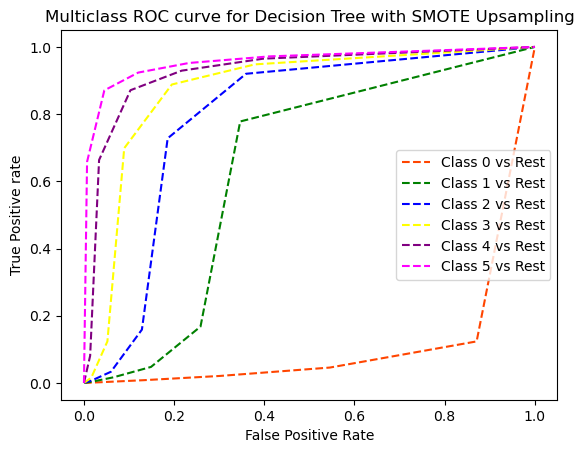

In [85]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling and PCA

In [87]:
DT_classifier_NM_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_PCA.fit(X_train_dres_nm_PCAreduced,y_train_dres_nm)
y_pred_NM_PCA = DT_classifier_NM_PCA.predict(X_test_NM_PCA_transformed)

In [88]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(classification_report(y_test, y_pred_NM_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_PCA))
print('Precision:',precision_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_PCA))

Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:

[[45593 43729 49199 49036 49474 62214]
 [ 8160 15097 13756 13602 13848 18603]
 [ 3770  6232 11502  9564  8813 12668]
 [ 2049  3004  5097  9252  6459  8632]
 [  759  1154  1730  3255  6633  4889]
 [  164   244   325   521  1378  4463]]
[[45593 43729 49199 49036 49474 62214]
 [ 8160 15097 13756 13602 13848 18603]
 [ 3770  6232 11502  9564  8813 12668]
 [ 2049  3004  5097  9252  6459  8632]
 [  759  1154  1730  3255  6633  4889]
 [  164   244   325   521  1378  4463]]
              precision    recall  f1-score   support

           0       0.75      0.15      0.25    299245
           1       0.22      0.18      0.20     83066
           2       0.14      0.22      0.17     52549
           3       0.11      0.27      0.15     34493
           4       0.08      0.36      0.13     18420
           5       0.04      0.63      0.08      7095

    accuracy                           0.19    494868
   macro avg       

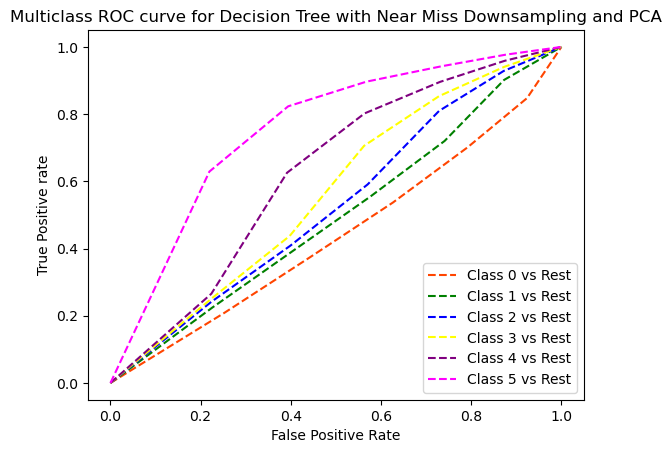

In [89]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with SMOTE Upsampling and PCA

In [91]:
DT_classifier_SMOTE_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_PCA.fit(X_train_ures_SMOTE_PCAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_PCA = DT_classifier_SMOTE_PCA.predict(X_test_SMOTE_PCA_transformed)

In [92]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(classification_report(y_test, y_pred_SMOTE_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_PCA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_PCA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:

[[236853  29290  14893   9891   5805   2513]
 [ 18478  46500  10700   4308   2183    897]
 [  5780   9982  27208   6802   2068    709]
 [  2907   2716   6554  17813   3739    764]
 [  1256   1078   1477   3555   9623   1431]
 [   456    321    381    498   1406   4033]]
[[236853  29290  14893   9891   5805   2513]
 [ 18478  46500  10700   4308   2183    897]
 [  5780   9982  27208   6802   2068    709]
 [  2907   2716   6554  17813   3739    764]
 [  1256   1078   1477   3555   9623   1431]
 [   456    321    381    498   1406   4033]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84    299245
           1       0.52      0.56      0.54     83066
           2       0.44      0.52      0.48     52549
           3       0.42      0.52      0.46     34493
           4       0.39      0.52      0.45     18420
           5       0.39      0.57      0.46      7095

    acc

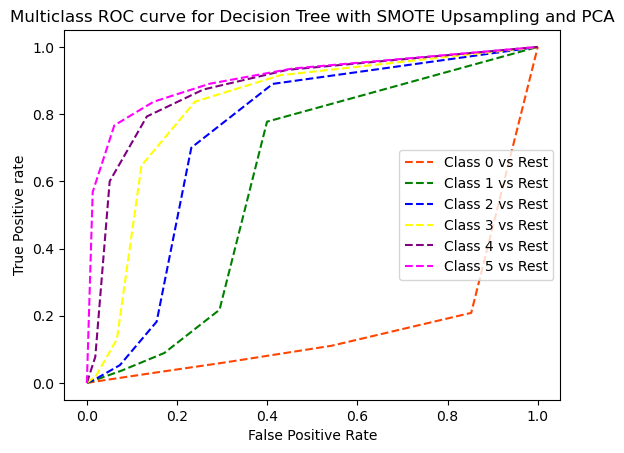

In [93]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA',dpi=300)

#### <font color='purple'>Decision Tree Algorithm without resampling

In [95]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [96]:
print('Performance of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling:

[[268256  20617   5873   2855   1230    414]
 [ 21945  48462   9273   2266    881    239]
 [  6095  10474  28431   5984   1244    321]
 [  2902   2429   6903  18434   3403    422]
 [  1170    880   1338   3888   9793   1351]
 [   436    246    301    442   1500   4170]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    299245
           1       0.58      0.58      0.58     83066
           2       0.55      0.54      0.54     52549
           3       0.54      0.53      0.54     34493
           4       0.54      0.53      0.54     18420
           5       0.60      0.59      0.60      7095

    accuracy                           0.76    494868
   macro avg       0.62      0.61      0.62    494868
weighted avg       0.76      0.76      0.76    494868

Accuracy: 0.7629226379559801
Precision: 0.7618453590798905
Recall: 0.7629226379559801
F1 Score: 0.7623728129664117
Cohen Kappa

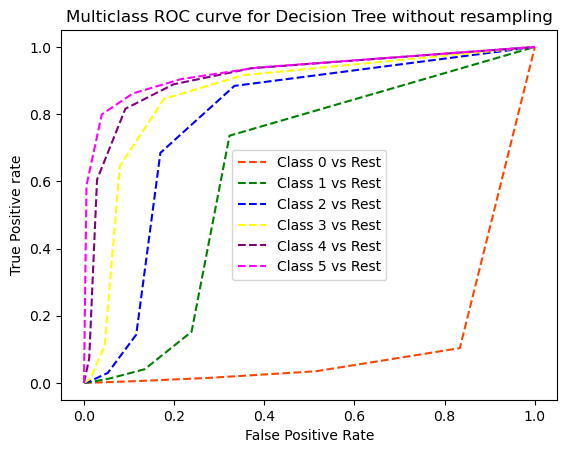

In [97]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling',dpi=300)

#### <font color='purple'>Decision Tree Algorithm without resampling  - Hyperparameter Tuning

In [99]:
DT_classifier.get_depth()

50

In [100]:
params = {
          'max_depth': [40, 50, 60, 70, 80],
          'max_features':['log2','sqrt',None]
}

In [101]:
grid_search = GridSearchCV(estimator=DT_classifier,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [102]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


python(40291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(40298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


CPU times: user 34.9 s, sys: 996 ms, total: 35.9 s
Wall time: 4min 2s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['log2', 'sqrt', None]},
             scoring='accuracy', verbose=1)

In [103]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,55.118886,0.224875,0.888007,0.075908,40,None,"{'max_depth': 40, 'max_features': None}",0.738597,0.737576,0.737398,0.738241,0.737953,0.000487,1
8,45.559454,0.277641,0.448899,0.034143,60,None,"{'max_depth': 60, 'max_features': None}",0.738753,0.738104,0.737115,0.737744,0.737929,0.000593,2
5,47.342480,0.115412,0.613440,0.119655,50,None,"{'max_depth': 50, 'max_features': None}",0.738346,0.737522,0.737538,0.737845,0.737813,0.000334,3
14,36.283350,0.379767,0.285061,0.043981,80,None,"{'max_depth': 80, 'max_features': None}",0.738278,0.738306,0.736812,0.737525,0.737730,0.000616,4
11,45.604343,0.127929,0.534403,0.132900,70,None,"{'max_depth': 70, 'max_features': None}",0.738108,0.737938,0.737552,0.737321,0.737730,0.000310,5


#### <font color='purple'>Decision Tree Algorithm without resampling - Setting the right hyperparameters

In [105]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=60)
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [106]:
print('Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:

[[268226  20666   5945   2800   1216    392]
 [ 21953  48428   9350   2248    852    235]
 [  6121  10452  28451   6002   1208    315]
 [  2894   2405   6836  18468   3429    461]
 [  1195    851   1356   3863   9782   1373]
 [   414    238    306    478   1492   4167]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    299245
           1       0.58      0.58      0.58     83066
           2       0.54      0.54      0.54     52549
           3       0.55      0.54      0.54     34493
           4       0.54      0.53      0.54     18420
           5       0.60      0.59      0.59      7095

    accuracy                           0.76    494868
   macro avg       0.62      0.61      0.62    494868
weighted avg       0.76      0.76      0.76    494868

Accuracy: 0.7628741401747536
Precision: 0.7618010547062107
Recall: 0.7628741401747536
F1 Score: 

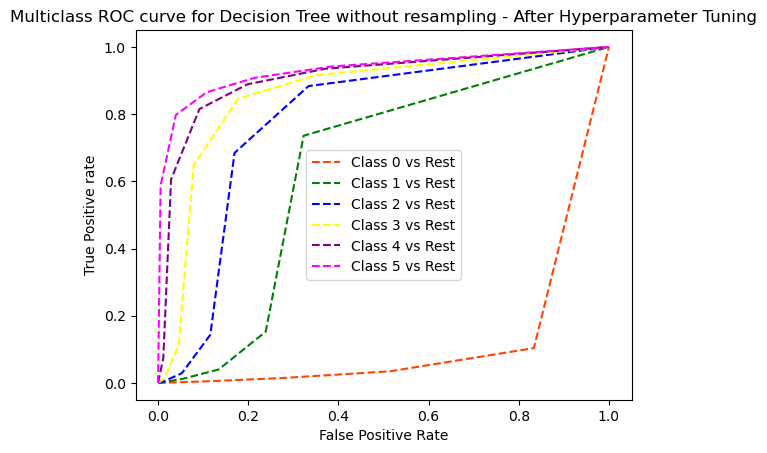

In [107]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning',dpi=300)

#### <font color='darkblue'>KNN Algorithm without resampling

In [109]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [110]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[279686  14607   2814   1356    605    177]
 [ 28381  45507   7217   1372    464    125]
 [ 10156  10731  25771   4916    801    174]
 [  5048   2682   6777  17002   2731    253]
 [  2394    906   1447   3743   8833   1097]
 [   753    272    328    460   1412   3870]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    299245
           1       0.61      0.55      0.58     83066
           2       0.58      0.49      0.53     52549
           3       0.59      0.49      0.54     34493
           4       0.59      0.48      0.53     18420
           5       0.68      0.55      0.61      7095

    accuracy                           0.77    494868
   macro avg       0.65      0.58      0.61    494868
weighted avg       0.76      0.77      0.76    494868

Accuracy: 0.7692334117380797
Precision: 0.7550380350070923
Recall: 0.7692334117380797
F1 Score: 0.7597991642138022
Cohen Kappa Score: 0.

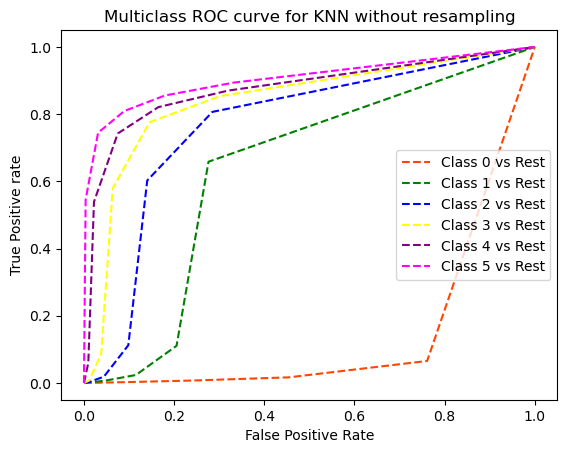

In [111]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

#### <font color='darkblue'>KNN Algorithm without resampling  - Hyperparameter Tuning

In [ ]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

In [114]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.638476,0.377596,57.909932,0.736862,1,{'n_neighbors': 1},0.775114,0.776296,0.775311,0.775574,0.000517,1
1,1.356055,0.100787,96.934165,2.424376,2,{'n_neighbors': 2},0.759784,0.760896,0.760086,0.760256,0.000470,2
2,1.402169,0.073441,125.895067,2.693402,3,{'n_neighbors': 3},0.753792,0.754166,0.753611,0.753856,0.000231,3
3,1.260999,0.020820,148.794943,1.180532,4,{'n_neighbors': 4},0.750108,0.751477,0.751203,0.750929,0.000592,4
4,1.329185,0.037434,170.461147,1.616075,5,{'n_neighbors': 5},0.746305,0.747009,0.746715,0.746677,0.000289,5


#### <font color='darkblue'>KNN Algorithm without resampling - Setting the right hyperparameters

In [116]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [117]:
print('Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:

[[274955  17897   3679   1736    783    195]
 [ 17979  52980   9755   1674    524    154]
 [  3891   9870  31155   6496    948    189]
 [  1913   1611   6503  20421   3712    333]
 [   824    528    945   3655  10969   1499]
 [   234    147    192    330   1445   4747]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    299245
           1       0.64      0.64      0.64     83066
           2       0.60      0.59      0.59     52549
           3       0.60      0.59      0.59     34493
           4       0.60      0.60      0.60     18420
           5       0.67      0.67      0.67      7095

    accuracy                           0.80    494868
   macro avg       0.67      0.67      0.67    494868
weighted avg       0.80      0.80      0.80    494868

Accuracy: 0.7986513575337262
Precision: 0.7982935187700809
Recall: 0.7986513575337262
F1 Score: 0.79847104

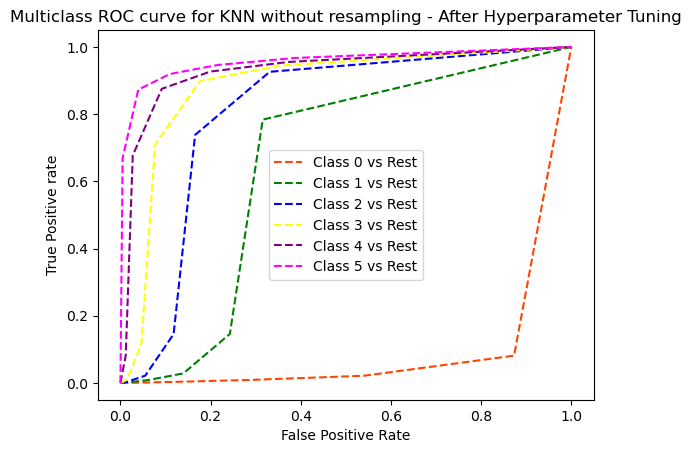

In [118]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning',dpi=300)

#### <font color='darkblue'>KNN Algorithm with SMOTE upsampling

In [120]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

In [121]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Performance of KNN Algorithm with SMOTE Upsampling:

[[269691  20452   4848   2514   1318    422]
 [ 15403  54359  10347   1972    729    256]
 [  2729   9530  31975   6875   1172    268]
 [  1170   1478   6293  21142   3978    432]
 [   440    419    888   3634  11431   1608]
 [   118    104    146    302   1471   4954]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92    299245
           1       0.63      0.65      0.64     83066
           2       0.59      0.61      0.60     52549
           3       0.58      0.61      0.60     34493
           4       0.57      0.62      0.59     18420
           5       0.62      0.70      0.66      7095

    accuracy                           0.80    494868
   macro avg       0.65      0.68      0.67    494868
weighted avg       0.80      0.80      0.80    494868

Accuracy: 0.7952666165522927
Precision: 0.801758151083889
Recall: 0.7952666165522927
F1 Score: 0.7981975830544615
Cohen Kappa Score: 

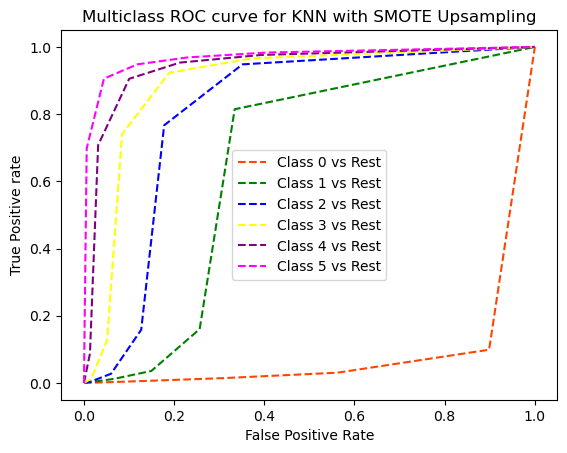

In [122]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

#### <font color='darkblue'>KNN Algorithm with Near Miss downsampling

In [124]:
knn_classifier_NM = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_NM.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_knn_NM = knn_classifier_NM.predict(X_test)

In [125]:
print('Performance of KNN Algorithm with NM Downsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_NM))
print(classification_report(y_test, y_pred_knn_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_NM))
print('Precision:',precision_score(y_test, y_pred_knn_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_NM))

Performance of KNN Algorithm with NM Downsampling:

[[57686 50572 53522 53198 40837 43430]
 [ 7713 18670 16448 14763 11573 13899]
 [ 2923  5931 14174 11606  7778 10137]
 [ 1458  2275  5125 11563  6613  7459]
 [  434   597  1256  3429  7626  5078]
 [   26    71   101   315  1240  5342]]
              precision    recall  f1-score   support

           0       0.82      0.19      0.31    299245
           1       0.24      0.22      0.23     83066
           2       0.16      0.27      0.20     52549
           3       0.12      0.34      0.18     34493
           4       0.10      0.41      0.16     18420
           5       0.06      0.75      0.12      7095

    accuracy                           0.23    494868
   macro avg       0.25      0.36      0.20    494868
weighted avg       0.57      0.23      0.27    494868

Accuracy: 0.2325084669043058
Precision: 0.5664887557511156
Recall: 0.2325084669043058
F1 Score: 0.26887856642437447
Cohen Kappa Score: 0.09355157402001324


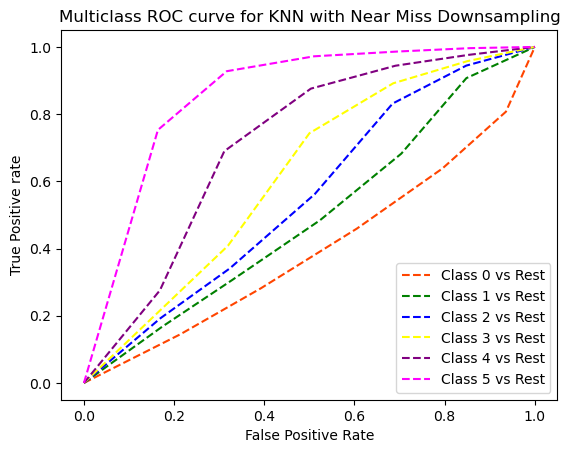

In [126]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling',dpi=300)

#### <font color='violet'>Naive Bayes Algorithm without resampling

In [128]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [129]:
print('Performance of Naive Bayes Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
print('Accuracy:',accuracy_score(y_test, y_pred_NB))
print('Precision:',precision_score(y_test, y_pred_NB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NB))

Performance of Naive Bayes Algorithm without resampling:

[[281528   1628   3406   8710   2381   1592]
 [ 73366    712   1663   5438   1148    739]
 [ 43498    623   1467   4848   1276    837]
 [ 26211    557   1241   4315   1163   1006]
 [ 13152    297    762   2603    692    914]
 [  5038     90    249    616    247    855]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76    299245
           1       0.18      0.01      0.02     83066
           2       0.17      0.03      0.05     52549
           3       0.16      0.13      0.14     34493
           4       0.10      0.04      0.05     18420
           5       0.14      0.12      0.13      7095

    accuracy                           0.59    494868
   macro avg       0.23      0.21      0.19    494868
weighted avg       0.45      0.59      0.48    494868

Accuracy: 0.5851439171657896
Precision: 0.4499104487639562
Recall: 0.5851439171657896
F1 Score: 0.4804411924156227
Cohen Kappa S

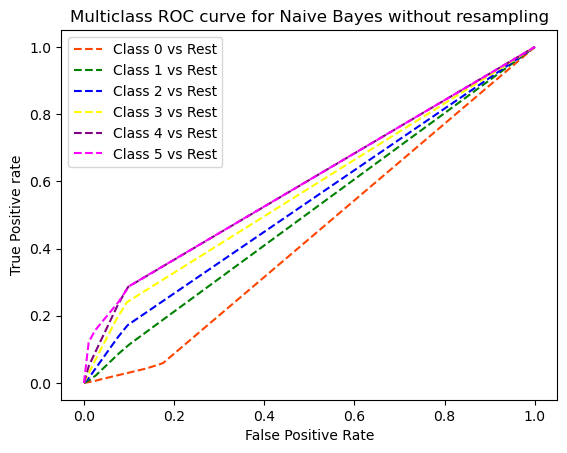

In [130]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NB, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Naive Bayes without resampling',dpi=300)

#### <font color='darkgreen'>Random Forest Algorithm without resampling

In [132]:
RF_classifier = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [133]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling:

[[287948   9670   1110    382    117     18]
 [ 30168  45008   6779    906    163     42]
 [ 11451   8440  27315   4846    453     44]
 [  5950   1701   5534  18492   2675    141]
 [  2679    619   1011   3354   9762    995]
 [   957    205    230    311   1259   4133]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    299245
           1       0.69      0.54      0.61     83066
           2       0.65      0.52      0.58     52549
           3       0.65      0.54      0.59     34493
           4       0.68      0.53      0.59     18420
           5       0.77      0.58      0.66      7095

    accuracy                           0.79    494868
   macro avg       0.71      0.61      0.66    494868
weighted avg       0.78      0.79      0.78    494868

Accuracy: 0.7934600742016052
Precision: 0.7793544919151412
Recall: 0.7934600742016052
F1 Score: 0.781155148457747
Cohen Kappa Score: 0.62

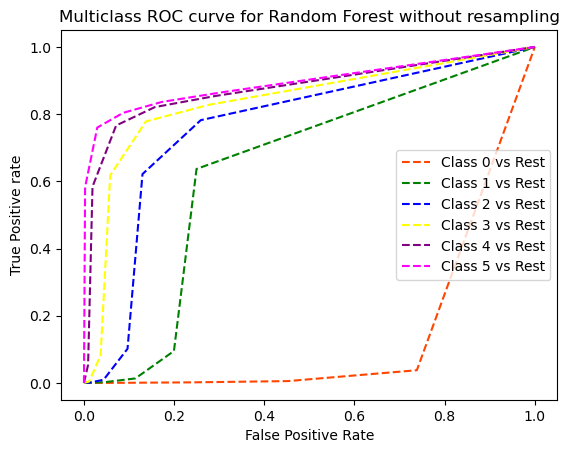

In [134]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling',dpi=300)

#### <font color='darkgreen'>Random Forest Algorithm without resampling - Hyperparameter Tuning

In [136]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [137]:
RF_random = RandomizedSearchCV(estimator = RF_classifier, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=0, n_jobs = -1)
RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


python(43289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(43296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
RF_random.best_params_

#### <font color='darkgreen'>Random Forest Algorithm without resampling - Setting the right Hyperparameters

In [149]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [150]:
print('Performance of RF Algorithm without resampling - After Hyperparamter Tuning:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling - After Hyperparamter Tuning:

[[289268   8771    813    276    105     12]
 [ 28159  47401   6536    787    152     31]
 [  9408   8773  29111   4776    440     41]
 [  4839   1238   5914  19704   2680    118]
 [  2111    395    824   3598  10490   1002]
 [   743    108    172    292   1354   4426]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    299245
           1       0.71      0.57      0.63     83066
           2       0.67      0.55      0.61     52549
           3       0.67      0.57      0.62     34493
           4       0.69      0.57      0.62     18420
           5       0.79      0.62      0.70      7095

    accuracy                           0.81    494868
   macro avg       0.73      0.64      0.68    494868
weighted avg       0.80      0.81      0.80    494868

Accuracy: 0.8091046501289233
Precision: 0.797058313313492
Recall: 0.8091046501289233
F1 Score: 0.79886622591

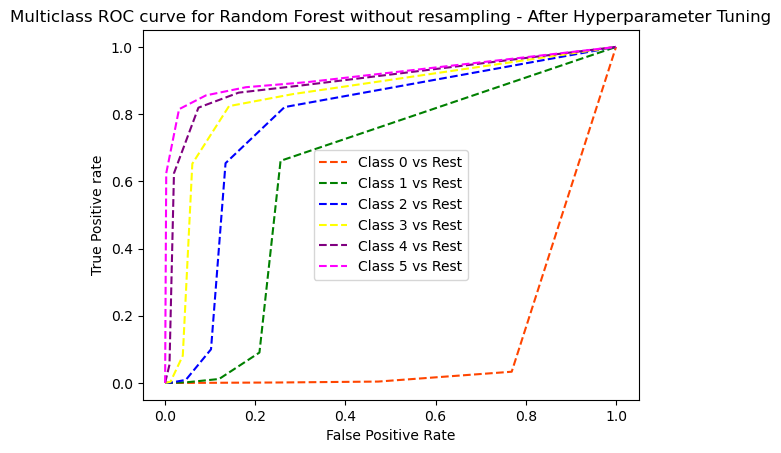

In [151]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning',dpi=300)

#### <font color='teal'>SVM with Polynomial Kernel of Degree 3 on Near Miss Downsampled Data

In [153]:
svm_classifier_nm = SVC(kernel='poly', degree=3, C = 1.0)
svm_classifier_nm.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_svm_nm = svm_classifier_nm.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print('Performance of SVM Algorithm with Near Miss downsampling:\n')
print(confusion_matrix(y_test, y_pred_svm_nm))
print(classification_report(y_test, y_pred_svm_nm))
print('Accuracy:',accuracy_score(y_test, y_pred_svm_nm))
print('Precision:',precision_score(y_test, y_pred_svm_nm, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm_nm, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_svm_nm, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm_nm))

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_svm_nm, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for SVM with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for SVM with Near Miss Downsampling',dpi=300)

### <font color='orangered'> Performance Analysis

In [159]:
all_labels = pd.DataFrame()
all_labels['Actual_label'] = y_test
all_labels['y_pred_DT'] = y_pred_DT
all_labels['y_pred_NM'] = y_pred_NM
all_labels['y_pred_SMOTE'] = y_pred_SMOTE
all_labels['y_pred_NM_PCA'] = y_pred_NM_PCA
all_labels['y_pred_SMOTE_PCA'] = y_pred_SMOTE_PCA
#all_labels['y_pred_NM_LDA'] = y_pred_NM_LDA
#all_labels['y_pred_SMOTE_LDA'] = y_pred_SMOTE_LDA
all_labels['y_pred_KNN'] = y_pred_knn
all_labels['y_pred_KNN_SMOTE'] = y_pred_knn_SMOTE
all_labels['y_pred_KNN_NM'] = y_pred_knn_NM
all_labels['y_pred_NB'] = y_pred_NB
all_labels['y_pred_RF'] = y_pred_RF
# all_labels['y_pred_svm_nm'] = y_pred_svm_nm
# all_labels[['y_pred_DT','Agglomerative_min_labels','Agglomerative_max_labels']]=independent_variables[['Agglomerative_labels','Agglomerative_min_labels','Agglomerative_max_labels']]

In [161]:
data = [
{'Algorithm':'Decision Tree without resampling' ,'Accuracy':0.76333688983729,'Precision':0.7623049559359242,'Recall':0.76333688983729,'F1 Score':0.7628094905920674,'Cohen Kappa Score':0.596681340983346},
{'Algorithm':'Decision Tree with Near Miss Downsampling','Accuracy':0.22480540265282864,'Precision':0.5431846016633978,'Recall':0.22480540265282864,'F1 Score':0.2626001987113276,'Cohen Kappa Score':0.07875957091418129},
{'Algorithm':'Decision Tree with SMOTE Upsampling','Accuracy':0.7642280365673271,'Precision':0.7725880165635359,'Recall':0.7642280365673271,'F1 Score':0.7679865604188995,'Cohen Kappa Score':0.6072223355459014},
{'Algorithm':'Decision Tree with Near Miss Downsampling and PCA','Accuracy':0.18901606084854952,'Precision':0.5208938985991317,'Recall':0.18901606084854952,'F1 Score':0.22407231601991243,'Cohen Kappa Score':0.05972201042990921},
{'Algorithm':'Decision Tree with SMOTE Upsampling and PCA','Accuracy':0.6911580461860537,'Precision':0.721815047933934,'Recall':0.6911580461860537,'F1 Score':0.7032986584993112,'Cohen Kappa Score':0.5045037482498997},
{'Algorithm':'Decision Tree with Near Miss Downsampling and LDA','Accuracy':0.20474752863389833,'Precision':0.5142486750813464,'Recall':0.20474752863389833,'F1 Score':0.24971268616453107,'Cohen Kappa Score':0.05777192884677773},
{'Algorithm':'Decsion Tree with SMOTE Upsampling and LDA','Accuracy':0.6028092339775455,'Precision':0.6746275672595141,'Recall':0.6028092339775455,'F1 Score':0.6283270075892382,'Cohen Kappa Score':0.3947227897216127},
{'Algorithm':'KNN without resampling','Accuracy':0.7986513575337262,'Precision':0.7982935187700809,'Recall':0.7986513575337262,'F1 Score':0.7984710410835046,'Cohen Kappa Score':0.6574980649397748},
{'Algorithm':'KNN with SMOTE Upsampling','Accuracy':0.7952666165522927,'Precision':0.801758151083889,'Recall':0.7952666165522927,'F1 Score':0.7981975830544615,'Cohen Kappa Score':0.6578269982214404},
{'Algorithm':'KNN with Near Miss Upsampling','Accuracy':0.2325084669043058,'Precision':0.5664887557511156,'Recall':0.2325084669043058,'F1 Score':0.2688785664243745,'Cohen Kappa Score':0.09355157402001324},
{'Algorithm':'Naive Bayes without resampling','Accuracy':0.5851439171657896,'Precision':0.4499104487639562,'Recall':0.5851439171657896,'F1 Score':0.4804411924156227,'Cohen Kappa Score':0.08074571293428756},
{'Algorithm':'Random Forest without resampling','Accuracy':0.8089591567852438,'Precision':0.7969254562173812,'Recall':0.8089591567852438,'F1 Score':0.7986904178915076,'Cohen Kappa Score':0.6549810654516983},
{'Algorithm':'SVM with Near Miss Downsampling','Accuracy':0.2995344213002255,'Precision':0.5123237426347645,'Recall':0.2995344213002255,'F1 Score':0.36286713356946726,'Cohen Kappa Score':0.07811063221491454}]
performance_metrics = pd.DataFrame(data)
performance_metrics.sort_values(by=['Accuracy', 'Cohen Kappa Score'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
11,Random Forest without resampling,0.808959,0.796925,0.808959,0.798690,0.654981
7,KNN without resampling,0.798651,0.798294,0.798651,0.798471,0.657498
8,KNN with SMOTE Upsampling,0.795267,0.801758,0.795267,0.798198,0.657827
2,Decision Tree with SMOTE Upsampling,0.764228,0.772588,0.764228,0.767987,0.607222
0,Decision Tree without resampling,0.763337,0.762305,0.763337,0.762809,0.596681
4,Decision Tree with SMOTE Upsampling and PCA,0.691158,0.721815,0.691158,0.703299,0.504504
6,Decsion Tree with SMOTE Upsampling and LDA,0.602809,0.674628,0.602809,0.628327,0.394723
10,Naive Bayes without resampling,0.585144,0.449910,0.585144,0.480441,0.080746
12,SVM with Near Miss Downsampling,0.299534,0.512324,0.299534,0.362867,0.078111
9,KNN with Near Miss Upsampling,0.232508,0.566489,0.232508,0.268879,0.093552
